In [1]:
import numpy as np
import pandas as pd
from sklearn.metrics import r2_score, mean_squared_error, explained_variance_score
from sklearn.linear_model import LinearRegression
import wrangle
import matplotlib.pyplot as plt
import seaborn as sns
import evaluate

# Load your zillow dataset.

In [2]:
df = wrangle.get_zillow()

# Fit a linear regression model (ordinary least squares) and compute yhat, predictions of taxvaluedollarcnt using only calculatedfinishedsqft.

In [3]:
# create and fit model, then make predictions
model = LinearRegression().fit(df[['calculatedfinishedsquarefeet']], df.taxvaluedollarcnt)
predictions = model.predict(df[['calculatedfinishedsquarefeet']])

# Plot the residuals for the linear regression model that you made.

In [4]:
df['yhat'] = predictions
df['baseline'] = df.taxvaluedollarcnt.mean()

In [5]:
df['residuals'] = df.yhat - df.taxvaluedollarcnt
df['baseline_residuals'] = df.baseline - df.taxvaluedollarcnt

In [6]:
df

,parcelid,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips,yhat,baseline,residuals,baseline_residuals
0,11544747,3.0,4.0,1620.0,847770.0,2011.0,10244.94,6037.0,322902.407304,327947.824862,-524867.592696,-519822.175138
1,11585547,3.0,2.0,2077.0,646760.0,1926.0,7924.68,6037.0,390998.250597,327947.824862,-255761.749403,-318812.175138
2,12716947,3.0,1.0,1244.0,169471.0,1950.0,2532.88,6037.0,266876.067963,327947.824862,97405.067963,158476.824862
3,12757147,3.0,2.0,1300.0,233266.0,1950.0,3110.99,6037.0,275220.416376,327947.824862,41954.416376,94681.824862
4,12757947,3.0,2.0,1222.0,290492.0,1951.0,3870.25,6037.0,263597.931087,327947.824862,-26894.068913,37455.824862
...,...,...,...,...,...,...,...,...,...,...,...,...
1855280,17275231,3.0,2.0,1917.0,408680.0,1946.0,4341.32,6111.0,367157.255133,327947.824862,-41522.744867,-80732.175138
1855281,13917885,4.0,2.0,1987.0,259913.0,1955.0,3175.66,6059.0,377587.690649,327947.824862,117674.690649,68034.824862
1855282,14762130,3.0,2.5,1809.0,405547.0,2012.0,4181.10,6059.0,351064.583195,327947.824862,-54482.416805,-77599.175138
1855283,14367624,3.0,2.5,1974.0,424353.0,2015.0,5302.70,6059.0,375650.609767,327947.824862,-48702.390233,-96405.175138


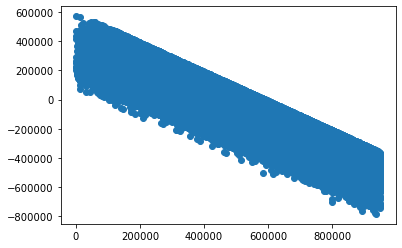

In [7]:
plt.scatter(df.taxvaluedollarcnt, df.residuals)
plt.show()

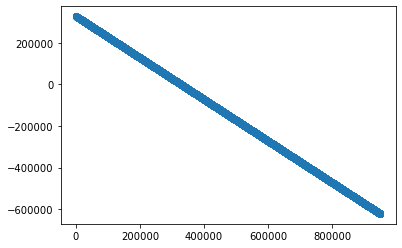

In [8]:
plt.scatter(df.taxvaluedollarcnt, df.baseline_residuals)
plt.show()

# Calculate the sum of squared errors, explained sum of squares, total sum of squares, mean squared error, and root mean squared error for your model.

In [9]:
MSE = mean_squared_error(df.taxvaluedollarcnt, df.yhat)
SSE = MSE * len(df)
RMSE = mean_squared_error(df.taxvaluedollarcnt, df.yhat, squared=False)
ESS = sum((df.yhat - df.taxvaluedollarcnt.mean())**2)
TSS = ESS + SSE
R2 = ESS / TSS
print('MSE for our model is: ', MSE)
print('SSE for our model is: ', SSE)
print('RMSE for our model is: ', RMSE)
print('ESS for our model is: ', ESS)
print('TSS for our model is: ', TSS)
print('R2 for our model is: ', R2)

MSE for our model is:  32509798200.837276
SSE for our model is:  6.031494095504038e+16
RMSE for our model is:  180304.7370449187
ESS for our model is:  1.3133068979652874e+16
TSS for our model is:  7.344800993469326e+16
R2 for our model is:  0.17880768983843429


# Calculate the sum of squared errors, mean squared error, and root mean squared error for the baseline model (i.e. a model that always predicts the average taxvaluedollarcnt amount).

In [10]:
MSE_baseline = mean_squared_error(df.taxvaluedollarcnt, df.baseline)
SSE_baseline = MSE_baseline * len(df)
RMSE_baseline = mean_squared_error(df.taxvaluedollarcnt, df.baseline, squared=False)
ESS_baseline = sum((df.baseline - df.taxvaluedollarcnt.mean())**2)
TSS_baseline = ESS_baseline + SSE_baseline
R2_baseline = ESS_baseline/TSS_baseline
print('MSE for baseline is: ', MSE_baseline)
print('SSE for baseline is: ', SSE_baseline)
print('RMSE for baseline is: ', RMSE_baseline)
print('ESS for baseline is: ', ESS_baseline)
print('TSS for baseline is: ', TSS_baseline)
print('ESS for ')

MSE for baseline is:  39588532184.92284
SSE for baseline is:  7.344800993470456e+16
RMSE for baseline is:  198968.67136542586
ESS for baseline is:  0.0
TSS for baseline is:  7.344800993470456e+16
ESS for 


# Write python code that compares the sum of squared errors for your model against the sum of squared errors for the baseline model and outputs whether or not your model performs better than the baseline model.

In [11]:
if SSE < SSE_baseline:
    print('My model outperforms baseline')
elif SSE == SSE_baseline:
    print('My model performs the same as baseline')
else:
    print('The baseline model performs better')

My model outperforms baseline


# Is your model better than the baseline model?

Yes, the model outperforms the baseline model

/opt/homebrew/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


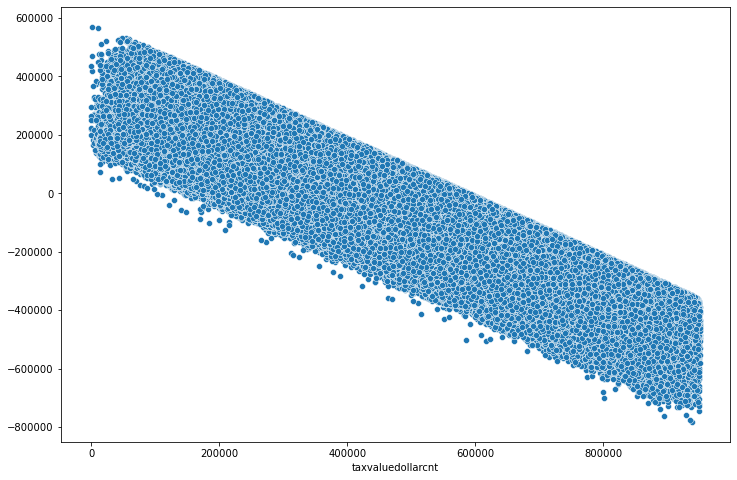

In [12]:
evaluate.plot_residuals(df.taxvaluedollarcnt, df.yhat)

In [14]:
evaluate.better_than_baseline(df['taxvaluedollarcnt'], df.yhat)

The model outperforms baseline
